### imports e dataframes

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import matplotlib as mpl
from cycler import cycler

CB_color_cycle = ['#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_color_cycle)

c:\venv\ilumpy\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df_mer = pd.read_excel("boltzina_mer.xlsx")
df_mcr = pd.read_excel("boltzina_mcr.xlsx")

df_mcr_cp = df_mcr.sort_values("docking_score")
df_mcr_cp

df_mer_cp = df_mer.sort_values("docking_score")
df_mer_cp

,zligand_name,ligand_idx,docking_ranking,docking_score,affinity_pred_value,affinity_probability_binary,boltz_ranking,affinity_pred_value1,affinity_probability_binary1,affinity_pred_value2,affinity_probability_binary2
664,"input_pdbs/84-26-4,pdb",1247,1,-9.939,1.670926,0.558689,665,1.715536,0.614754,1.626316,0.502624
447,"input_pdbs/72581-71-6,pdb",1144,2,-9.897,0.524142,0.609025,448,0.141445,0.623020,0.906839,0.595031
351,"input_pdbs/53527-42-7,pdb",851,3,-9.806,1.357038,0.626560,352,1.654333,0.681938,1.059742,0.571182
225,"input_pdbs/1617-53-4,pdb",212,4,-9.801,0.693021,0.651281,226,0.492769,0.735148,0.893272,0.567415
142,"input_pdbs/22888-70-6,pdb",373,5,-9.626,0.598246,0.669441,143,0.399056,0.733845,0.797437,0.605038
...,...,...,...,...,...,...,...,...,...,...,...
627,"input_pdbs/88082-60-4,pdb",1274,1353,1966.836,0.499727,0.566832,628,0.219654,0.597208,0.779800,0.536455
665,"input_pdbs/915792-03-9,pdb",1308,1354,1987.321,0.613104,0.558665,666,1.540106,0.673743,-0.313899,0.443586
766,"input_pdbs/19202-36-9,pdb",285,1355,2418.856,0.870972,0.530927,767,0.824318,0.536360,0.917625,0.525495
850,"input_pdbs/102040-03-9,pdb",4,1356,3039.392,-1.038134,0.502843,851,-1.185493,0.308535,-0.890774,0.697151


In [5]:
df_mcr_cp = df_mcr.loc[df_mcr_cp['docking_score'] < 0]
df_mer_cp = df_mer.loc[df_mer_cp['docking_score'] < 0]

### plots

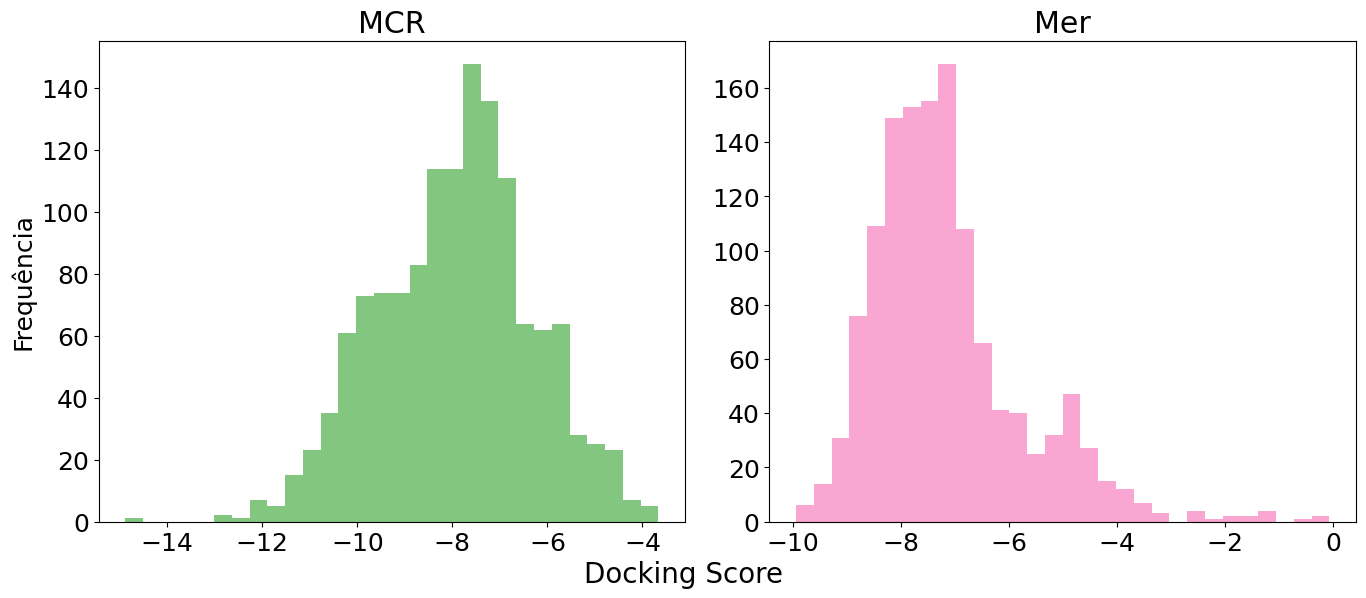

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 18})

# =========================
# SUBPLOT 1 — MCR
# =========================
plt.subplot(1, 2, 1)
plt.hist(
    df_mcr_cp['docking_score'],
    bins=30,
    alpha=0.7
)
plt.title("MCR")
plt.ylabel("Frequência")

# =========================
# SUBPLOT 2 — MER
# =========================
plt.subplot(1, 2, 2)
plt.hist(
    df_mer_cp['docking_score'],
    bins=30,
    alpha=0.7,
    color=CB_color_cycle[1]
)
plt.title("Mer")
plt.ylabel("")

# =========================
# Rótulo Único no Eixo X
# =========================
plt.subplots_adjust(bottom=0.15)
plt.figtext(0.5, 0.0005, "Docking Score", ha="center", fontsize=20)

plt.tight_layout()
plt.savefig("hist_docking_scores.png", dpi=300, bbox_inches='tight')
plt.show()


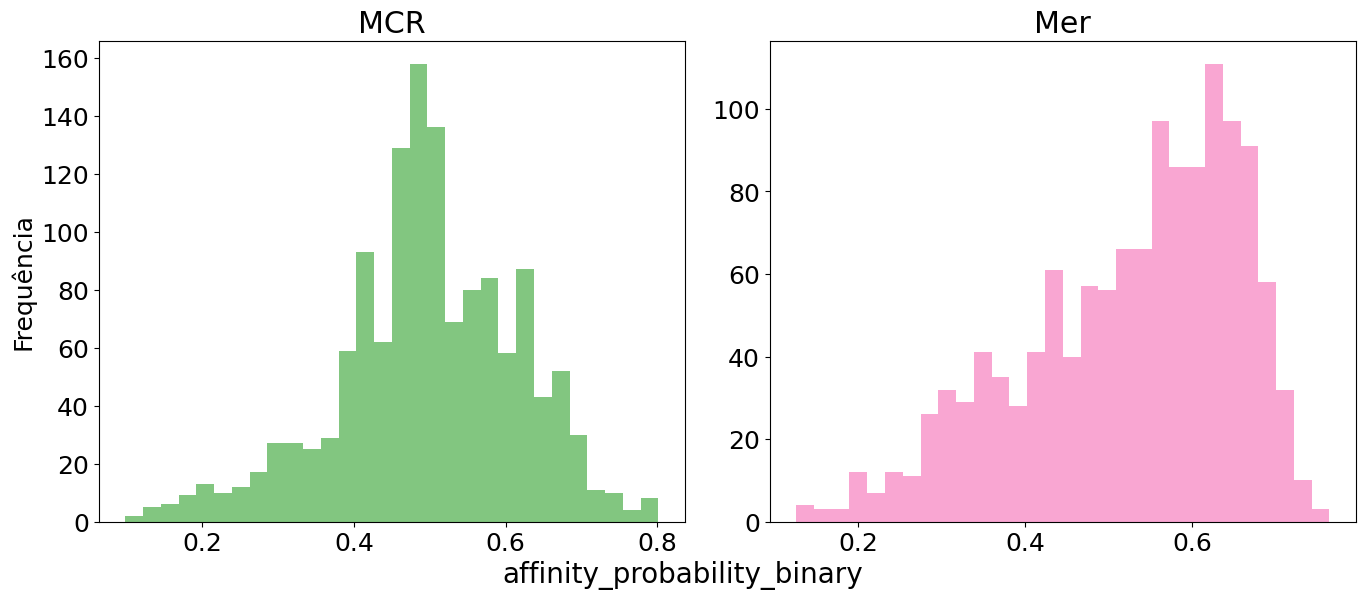

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 18})

# =========================
# SUBPLOT 1 — MCR
# =========================
plt.subplot(1, 2, 1)
plt.hist(
    df_mcr_cp['affinity_probability_binary'],
    bins=30,
    alpha=0.7
)
plt.title("MCR")
plt.ylabel("Frequência")

# =========================
# SUBPLOT 2 — MER
# =========================
plt.subplot(1, 2, 2)
plt.hist(
    df_mer_cp['affinity_probability_binary'],
    bins=30,
    alpha=0.7,
    color=CB_color_cycle[1]
)
plt.title("Mer")
plt.ylabel("")

# =========================
# Rótulo Único no Eixo X
# =========================
plt.subplots_adjust(bottom=0.15)
plt.figtext(0.5, 0.0005, "affinity_probability_binary", ha="center", fontsize=20)

plt.tight_layout()
plt.savefig("hist_boltz_scores.png", dpi=300, bbox_inches='tight')
plt.show()


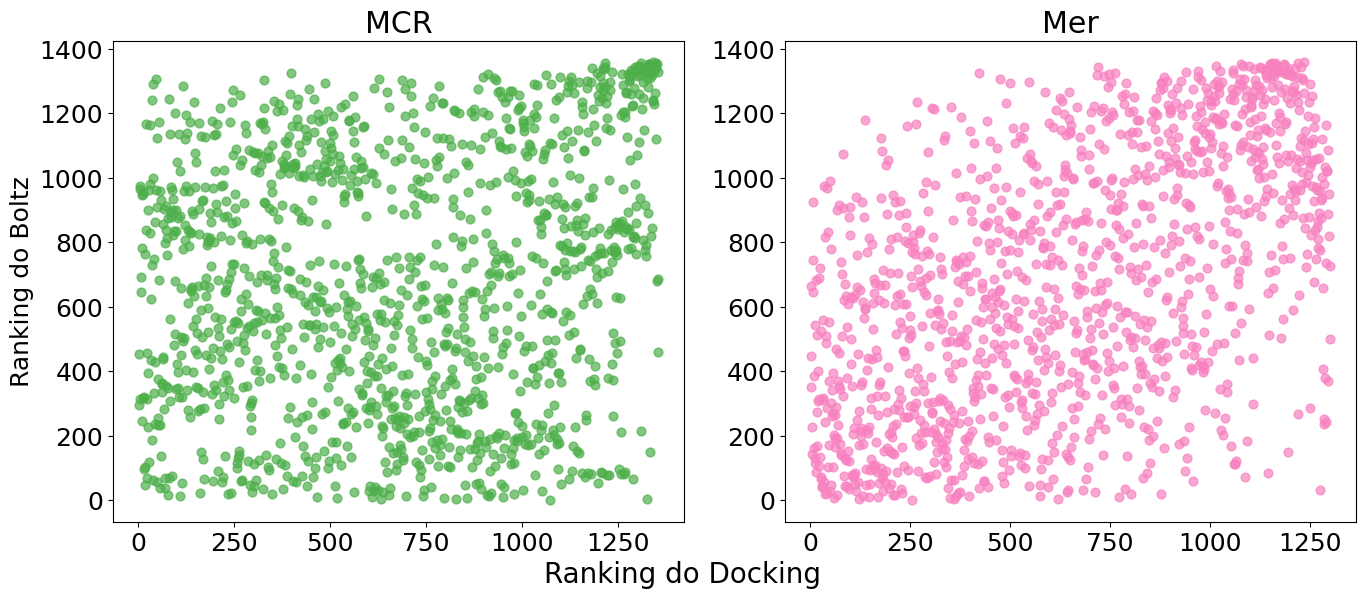

In [112]:
plt.figure(figsize=(14,6))

# Aumentar fonte global
plt.rcParams.update({'font.size': 18})

# =========================
# SUBPLOT 1 — MCR
# =========================
plt.subplot(1, 2, 1)
plt.scatter(
    df_mcr_cp['rank docking'],
    df_mcr_cp['rank boltz'],
    alpha=0.7,
    s=40,
    label='MCR'
)
plt.ylabel("Ranking do Boltz")
plt.title("MCR")

# =========================
# SUBPLOT 2 — MER (rosa)
# =========================

mer_color = CB_color_cycle[1]

plt.subplot(1, 2, 2)
plt.scatter(
    df_mer_cp['docking_ranking'],
    df_mer_cp['boltz_ranking'],
    alpha=0.7,
    s=40,
    color=mer_color,
    label='MER'
)
plt.title("Mer")
plt.ylabel("")   # remove o ylabel duplicado


# =========================
# RÓTULO ÚNICO NO EIXO X
# =========================
plt.subplots_adjust(bottom=0.15)  # espaço pra label centralizada
plt.figtext(0.5, 0.0005, "Ranking do Docking", ha="center", fontsize=20)

plt.tight_layout()

plt.savefig("ranking_comparacao.png", dpi=300, bbox_inches='tight')
plt.show()





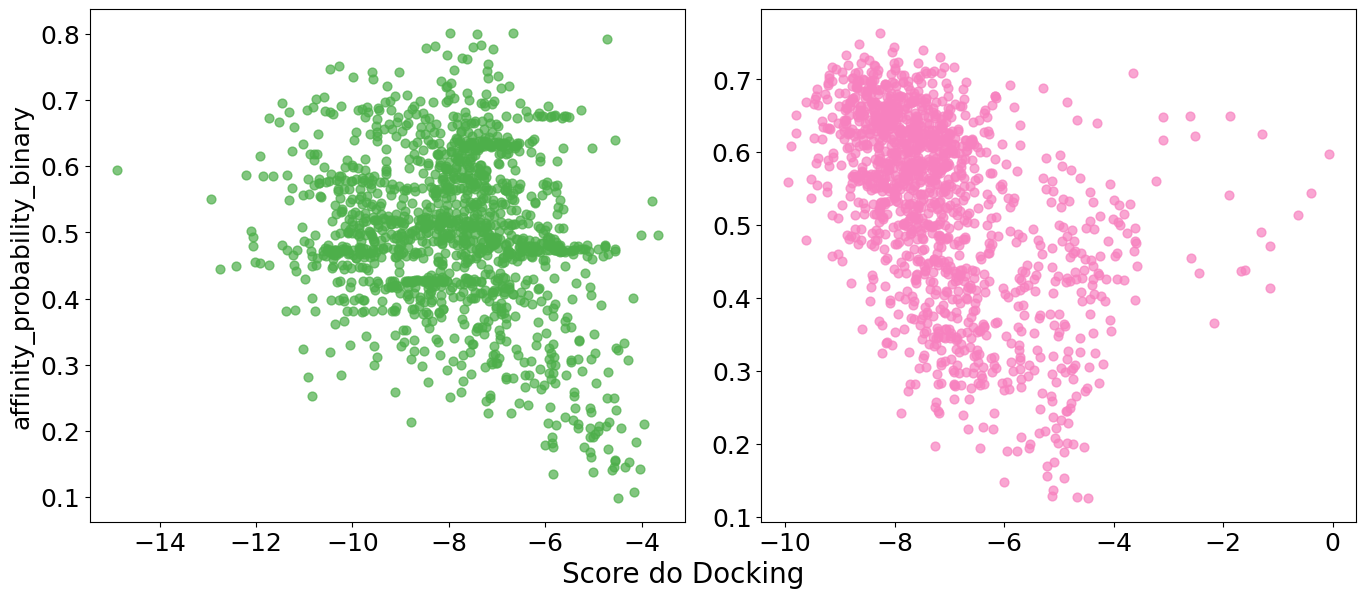

In [114]:
plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 18})

# =========================
# SUBPLOT 1 — MCR
# =========================
plt.subplot(1, 2, 1)
plt.scatter(
    df_mcr_cp['docking_score'],
    df_mcr_cp['affinity_probability_binary'],
    alpha=0.7,
    s=40,
)
plt.ylabel("affinity_probability_binary")


# =========================
# SUBPLOT 2 — MER
# =========================

mer_color = CB_color_cycle[1]   # rosa ou a cor que você quiser

plt.subplot(1, 2, 2)
plt.scatter(
    df_mer_cp['docking_score'],               # <-- coloque o nome correto aqui
    df_mer_cp['affinity_probability_binary'], # <-- coloque o nome correto aqui
    alpha=0.7,
    s=40,
    color=mer_color
)
plt.ylabel("")   # remove ylabel duplicado


# =========================
# RÓTULO ÚNICO DO EIXO X
# =========================
plt.subplots_adjust(bottom=0.15)
plt.figtext(0.5, 0.0005, "Score do Docking", ha="center", fontsize=20)

plt.tight_layout()
plt.savefig("score_docking_binario.png", dpi=300, bbox_inches='tight')

plt.show()


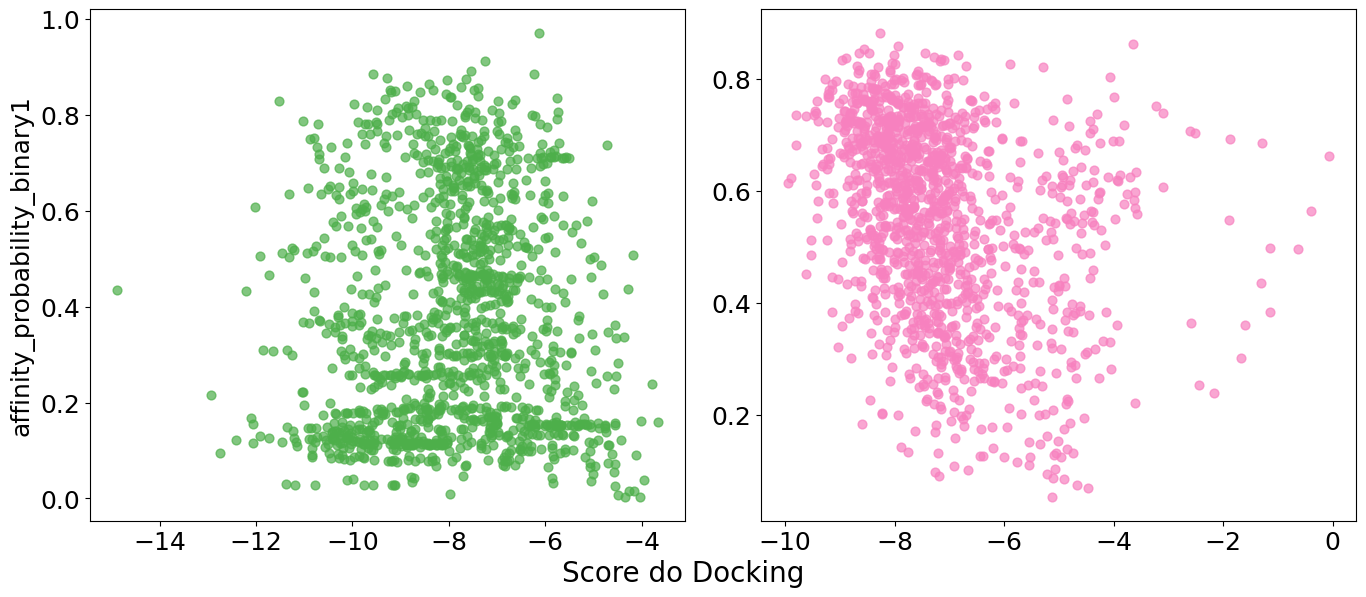

In [121]:
plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 18})


# =========================
# SUBPLOT 1 — MCR
# =========================
plt.subplot(1, 2, 1)

plt.scatter(
    df_mcr_cp['docking_score'],
    df_mcr_cp['affinity_probability_binary1'],
    alpha=0.7,
    s=40
)

plt.ylabel("affinity_probability_binary1")


# =========================
# SUBPLOT 2 — MER
# =========================

mer_color = CB_color_cycle[1]   # cor usada para MER

plt.subplot(1, 2, 2)

plt.scatter(
    df_mer_cp['docking_score'],                 # <-- ajuste se nome diferente
    df_mer_cp['affinity_probability_binary1'],  # <-- ajuste se nome diferente
    alpha=0.7,
    s=40,
    color=mer_color
)

plt.ylabel("")   # remove ylabel duplicado


# =========================
# EIXO X ÚNICO
# =========================
plt.subplots_adjust(bottom=0.15)
plt.figtext(0.5, 0.0005, "Score do Docking", ha="center", fontsize=20)
plt.savefig("score_docking_binario1.png", dpi=300, bbox_inches='tight')



plt.tight_layout()
plt.show()


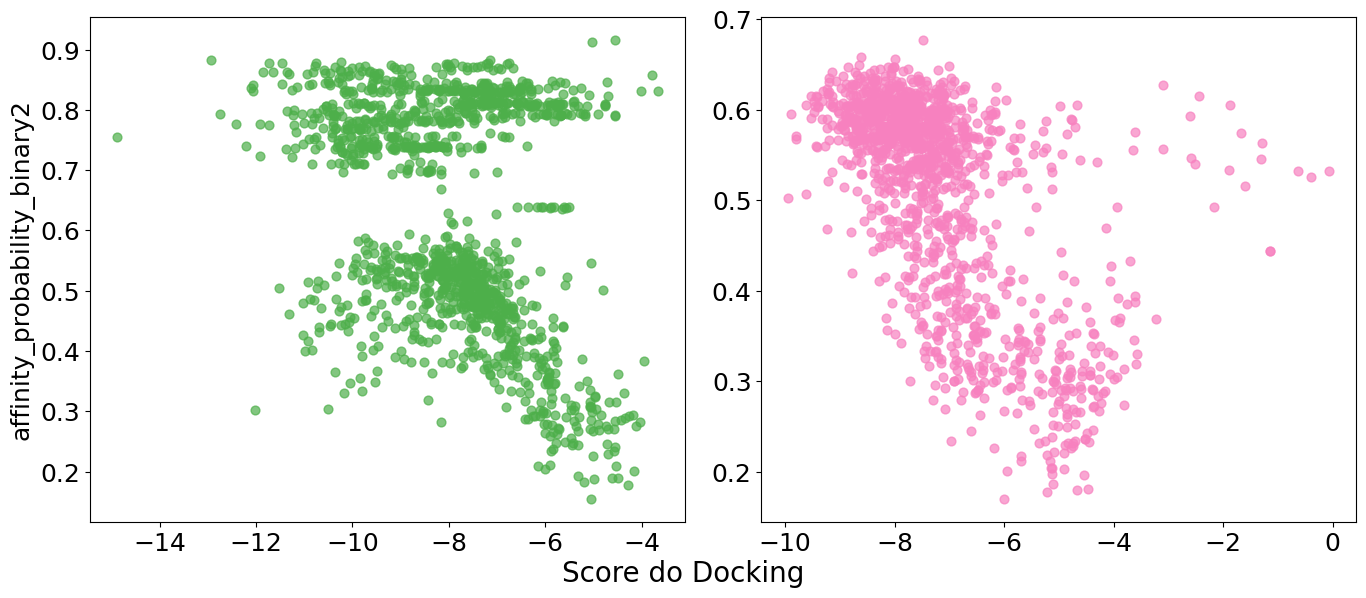

In [145]:
plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 18})


# =========================
# SUBPLOT 1 — MCR
# =========================
plt.subplot(1, 2, 1)

plt.scatter(
    df_mcr_cp['docking_score'],
    df_mcr_cp['affinity_probability_binary2'],
    alpha=0.7,
    s=40
)

plt.ylabel("affinity_probability_binary2")


# =========================
# SUBPLOT 2 — MER
# =========================

mer_color = CB_color_cycle[1]   # cor usada para MER

plt.subplot(1, 2, 2)

plt.scatter(
    df_mer_cp['docking_score'],                 # <-- ajuste se nome diferente
    df_mer_cp['affinity_probability_binary2'],  # <-- ajuste se nome diferente
    alpha=0.7,
    s=40,
    color=mer_color
)

plt.ylabel("")   # remove ylabel duplicado


# =========================
# EIXO X ÚNICO
# =========================
plt.subplots_adjust(bottom=0.15)
plt.figtext(0.5, 0.0005, "Score do Docking", ha="center", fontsize=20)

plt.savefig("score_docking_binario2.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


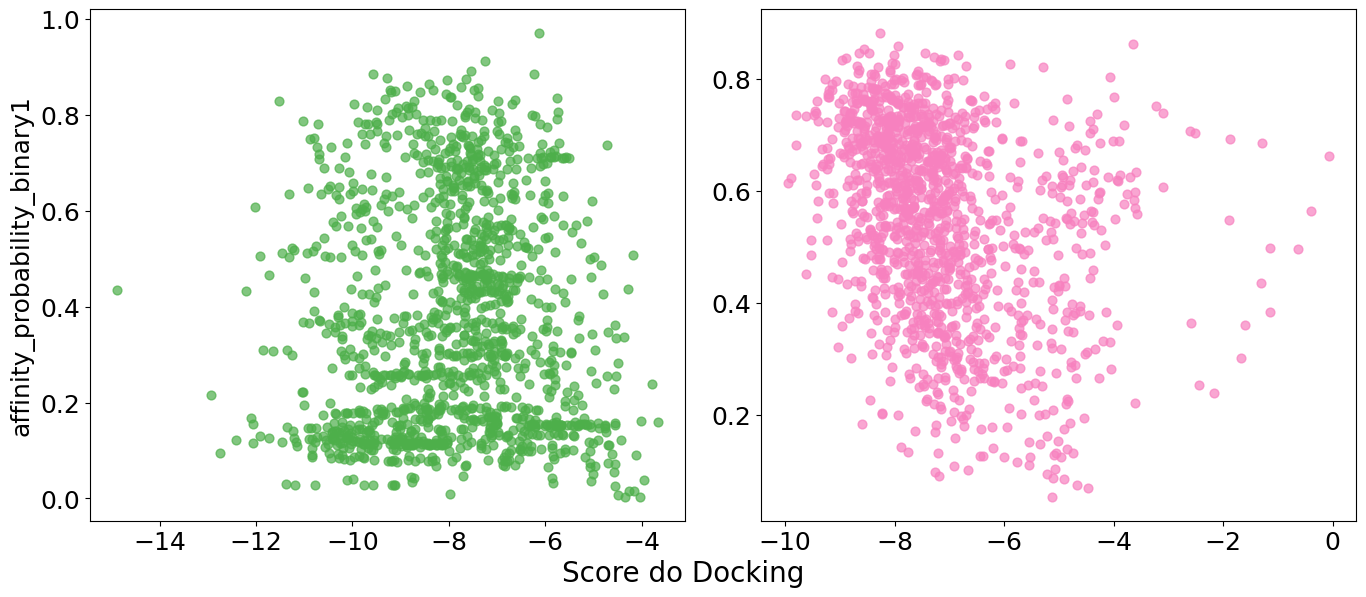

In [144]:
plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 18})


# =========================
# SUBPLOT 1 — MCR
# =========================
plt.subplot(1, 2, 1)

plt.scatter(
    df_mcr_cp['docking_score'],
    df_mcr_cp['affinity_probability_binary1'],
    alpha=0.7,
    s=40
)

plt.ylabel("affinity_probability_binary1")


# =========================
# SUBPLOT 2 — MER
# =========================

mer_color = CB_color_cycle[1]   # cor usada para MER

plt.subplot(1, 2, 2)

plt.scatter(
    df_mer_cp['docking_score'],                 # <-- ajuste se nome diferente
    df_mer_cp['affinity_probability_binary1'],  # <-- ajuste se nome diferente
    alpha=0.7,
    s=40,
    color=mer_color
)

plt.ylabel("")   # remove ylabel duplicado


# =========================
# EIXO X ÚNICO
# =========================
plt.subplots_adjust(bottom=0.15)
plt.figtext(0.5, 0.0005, "Score do Docking", ha="center", fontsize=20)

plt.savefig("score_docking_binario1.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


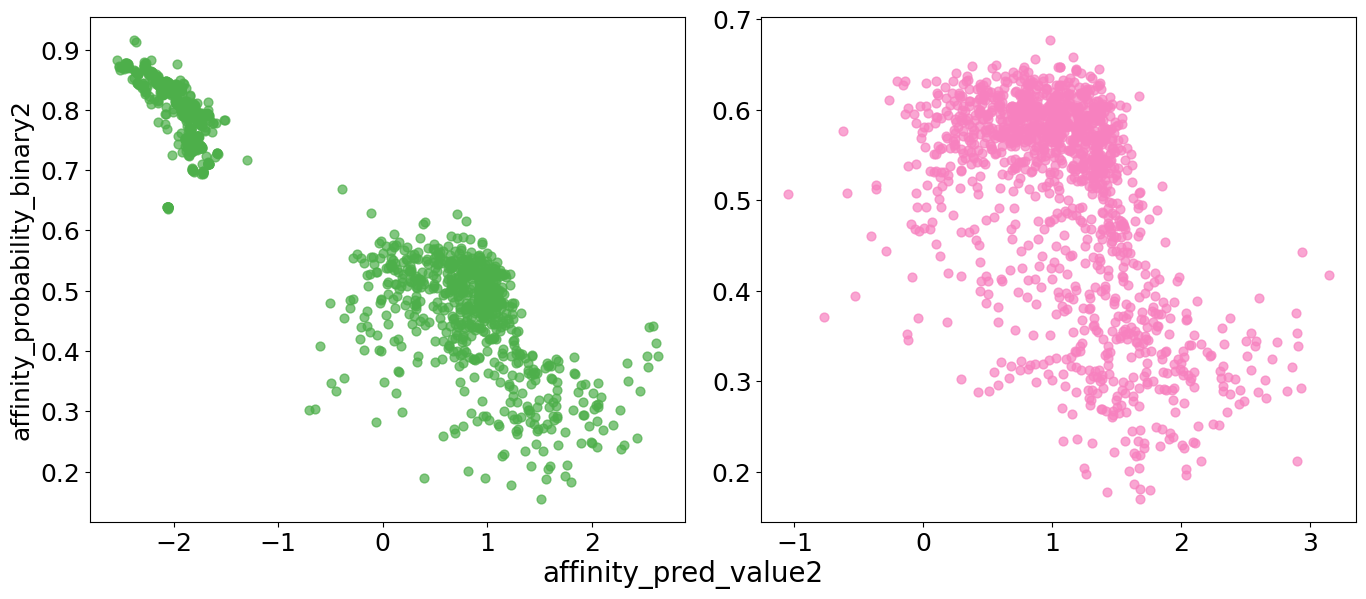

In [148]:
plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 18})


# =========================
# SUBPLOT 1 — MCR
# =========================
plt.subplot(1, 2, 1)

plt.scatter(
    df_mcr_cp['affinity_pred_value2'],
    df_mcr_cp['affinity_probability_binary2'],
    alpha=0.7,
    s=40
)

plt.ylabel("affinity_probability_binary2")


# =========================
# SUBPLOT 2 — MER
# =========================

mer_color = CB_color_cycle[1]   # cor usada para MER

plt.subplot(1, 2, 2)

plt.scatter(
    df_mer_cp['affinity_pred_value2'],                 # <-- ajuste se nome diferente
    df_mer_cp['affinity_probability_binary2'],  # <-- ajuste se nome diferente
    alpha=0.7,
    s=40,
    color=mer_color
)

plt.ylabel("")   # remove ylabel duplicado


# =========================
# EIXO X ÚNICO
# =========================
plt.subplots_adjust(bottom=0.15)
plt.figtext(0.5, 0.0005, "affinity_pred_value2", ha="center", fontsize=20)

#plt.savefig("score_docking_binario1.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


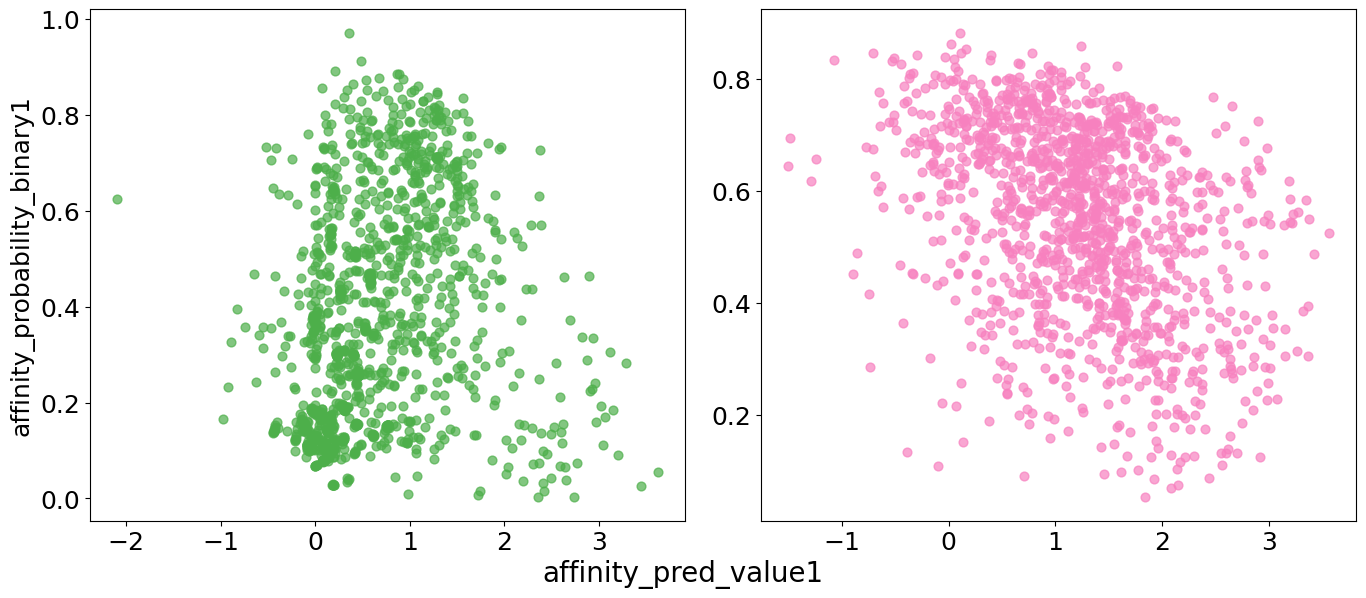

In [149]:
plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 18})


# =========================
# SUBPLOT 1 — MCR
# =========================
plt.subplot(1, 2, 1)

plt.scatter(
    df_mcr_cp['affinity_pred_value1'],
    df_mcr_cp['affinity_probability_binary1'],
    alpha=0.7,
    s=40
)

plt.ylabel("affinity_probability_binary1")


# =========================
# SUBPLOT 2 — MER
# =========================

mer_color = CB_color_cycle[1]   # cor usada para MER

plt.subplot(1, 2, 2)

plt.scatter(
    df_mer_cp['affinity_pred_value1'],                 # <-- ajuste se nome diferente
    df_mer_cp['affinity_probability_binary1'],  # <-- ajuste se nome diferente
    alpha=0.7,
    s=40,
    color=mer_color
)

plt.ylabel("")   # remove ylabel duplicado


# =========================
# EIXO X ÚNICO
# =========================
plt.subplots_adjust(bottom=0.15)
plt.figtext(0.5, 0.0005, "affinity_pred_value1", ha="center", fontsize=20)

#plt.savefig("score_docking_binario1.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


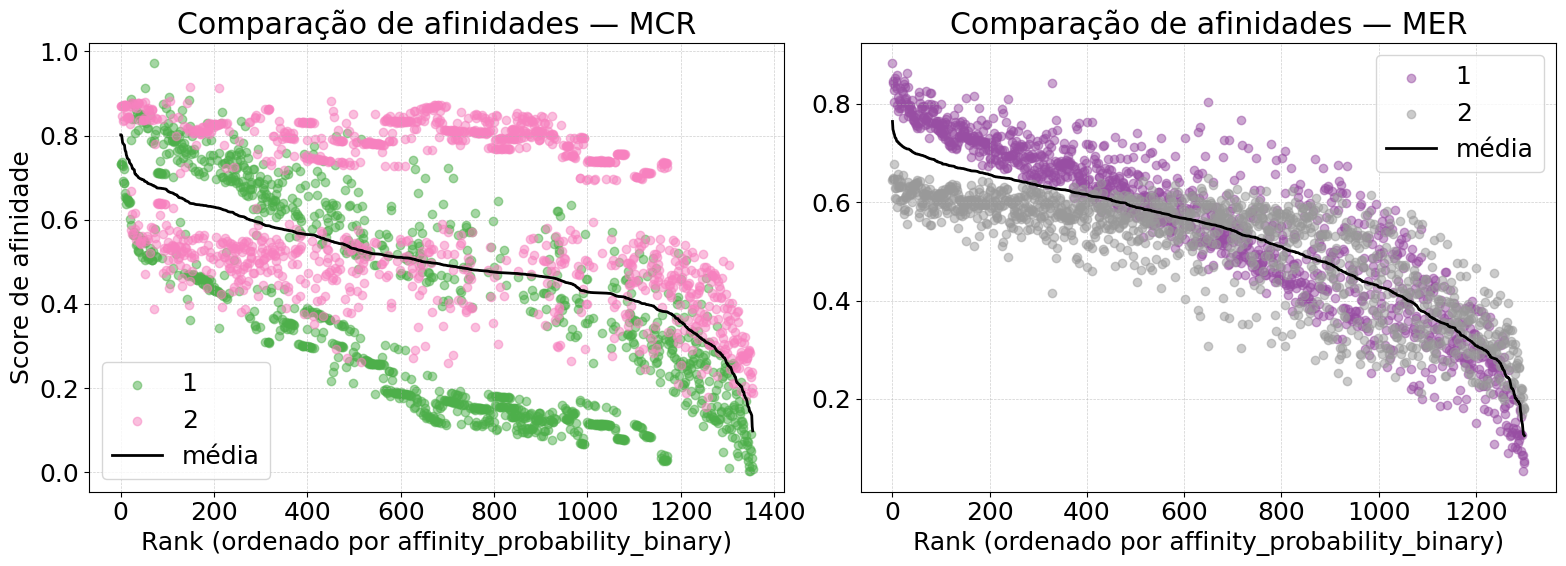

In [6]:
plt.figure(figsize=(16,6))
plt.rcParams.update({'font.size': 18})


# ============================
# SUBPLOT 1 — MCR
# ============================
df_mcr_sorted = df_mcr_cp.sort_values(
    "affinity_probability_binary", 
    ascending=False
).reset_index(drop=True)

plt.subplot(1, 2, 1)

plt.scatter(
    df_mcr_sorted.index,
    df_mcr_sorted["affinity_probability_binary1"],
    alpha=0.5,
    label="1"
    
)

plt.scatter(
    df_mcr_sorted.index,
    df_mcr_sorted["affinity_probability_binary2"],
    alpha=0.5,
    label="2"
)

plt.plot(
    df_mcr_sorted.index,
    df_mcr_sorted["affinity_probability_binary"],
    color="black",
    linewidth=2,
    label="média"
)

plt.title("Comparação de afinidades — MCR")
plt.xlabel("Rank (ordenado por affinity_probability_binary)")
plt.ylabel("Score de afinidade")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.legend(fontsize=18)


# ============================
# SUBPLOT 2 — MER
# ============================
df_mer_sorted = df_mer_cp.sort_values(
    "affinity_probability_binary", 
    ascending=False
).reset_index(drop=True)

plt.subplot(1, 2, 2)

plt.scatter(
    df_mer_sorted.index,
    df_mer_sorted["affinity_probability_binary1"],   # ajuste aqui se o nome for diferente
    alpha=0.5,
    color=CB_color_cycle[3],    # cor do modelo 1 (MER)
    label="1"
)

plt.scatter(
    df_mer_sorted.index,
    df_mer_sorted["affinity_probability_binary2"],   # ajuste aqui se o nome for diferente
    alpha=0.5,
    color=CB_color_cycle[4],    # cor do modelo 2 (MER)
    label="2"
)

plt.plot(
    df_mer_sorted.index,
    df_mer_sorted["affinity_probability_binary"],    # linha da média
    color="black",
    linewidth=2,
    label="média"
)

plt.title("Comparação de afinidades — MER")
plt.xlabel("Rank (ordenado por affinity_probability_binary)")
plt.ylabel("")  # remove ylabel duplicado
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.legend(fontsize=18)

plt.savefig("binario1_2.png", dpi=300, bbox_inches='tight')

# Layout final
plt.tight_layout()
plt.show()


In [30]:
df_mcr.columns

Index(['ligand_name', 'ligand_idx', 'docking_score', 'rank docking',
       'affinity_pred_value', 'rank boltz', 'affinity_probability_binary',
       'affinity_pred_value1', 'affinity_probability_binary1',
       'affinity_pred_value2', 'affinity_probability_binary2'],
      dtype='object')

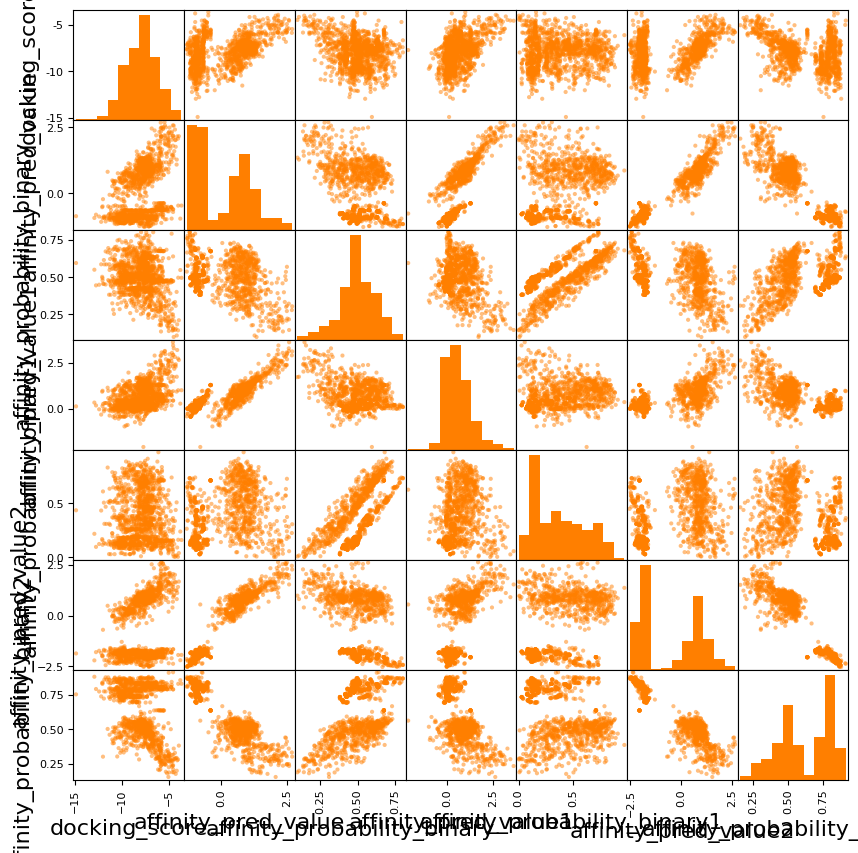

In [31]:
cols=['docking_score',  'affinity_pred_value', 'affinity_probability_binary', 'affinity_pred_value1', 'affinity_probability_binary1', 'affinity_pred_value2', 'affinity_probability_binary2']
pd.plotting.scatter_matrix(df_mcr_cp[cols], figsize=(10,10))
plt.show()

In [ ]:
plt.hist(data)
plt.show()

### contagem átomos

In [7]:
def count_ATOM(string):
    word = "ATOM"
    words = string.split()
    
    contagem = words.count(word)
    
    return contagem

In [8]:
df_mcr_cp = df_mcr_cp.set_index("ligand_idx").sort_index()
df_mer_cp = df_mer_cp.set_index("ligand_idx").sort_index()

In [9]:
df_mcr_cp["N_atoms"] = None

for i in range(1357):
    file_path = f"mcr/results/out/{i}/docked.pdbqt"
    try:
        with open(file_path) as f:
            content = f.read()
        contagem = count_ATOM(content)
    except:
        contagem = None

    df_mcr_cp.loc[i, "N_atoms"] = contagem

In [10]:
df_mer_cp["N_atoms"] = None

for i in range(1357):
    file_path = f"mer/results/out/{i}/docked.pdbqt"
    try:
        with open(file_path) as f:
            content = f.read()
        contagem = count_ATOM(content)
    except:
        contagem = None

    df_mer_cp.loc[i, "N_atoms"] = contagem


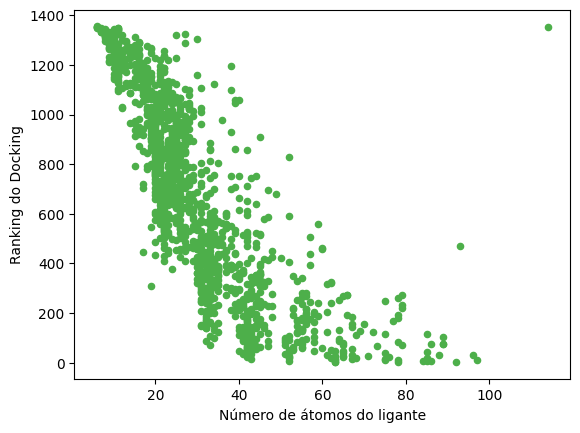

In [11]:
# filtrar ligantes com menos de 100 átomos
#df_mcr_cp = df_mcr_cp[df_mcr_cp["N_atoms"] < 100]
#df_mer_cp = df_mer_cp[df_mer_cp["N_atoms"] < 100]


df_mcr_cp.plot.scatter(y="rank docking", x="N_atoms")
plt.xlabel("Número de átomos do ligante")  # Set the x-axis label
plt.ylabel("Ranking do Docking")  # Set the y-axis label
plt.show()


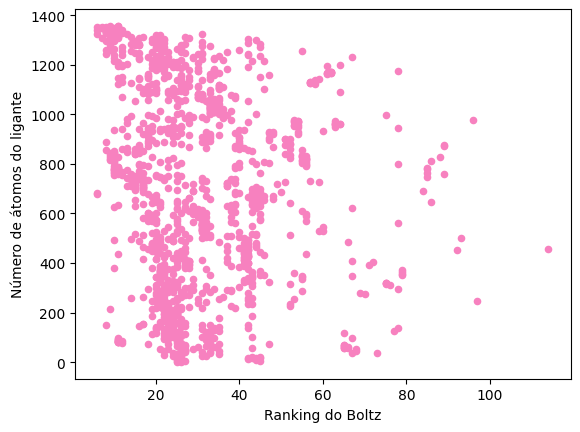

In [12]:
df_mcr_cp.plot.scatter(y='rank boltz', x='N_atoms', color=CB_color_cycle[1])
plt.xlabel("Ranking do Boltz")  # Set the x-axis label
plt.ylabel("Número de átomos do ligante")  # Set the y-axis label
plt.show()

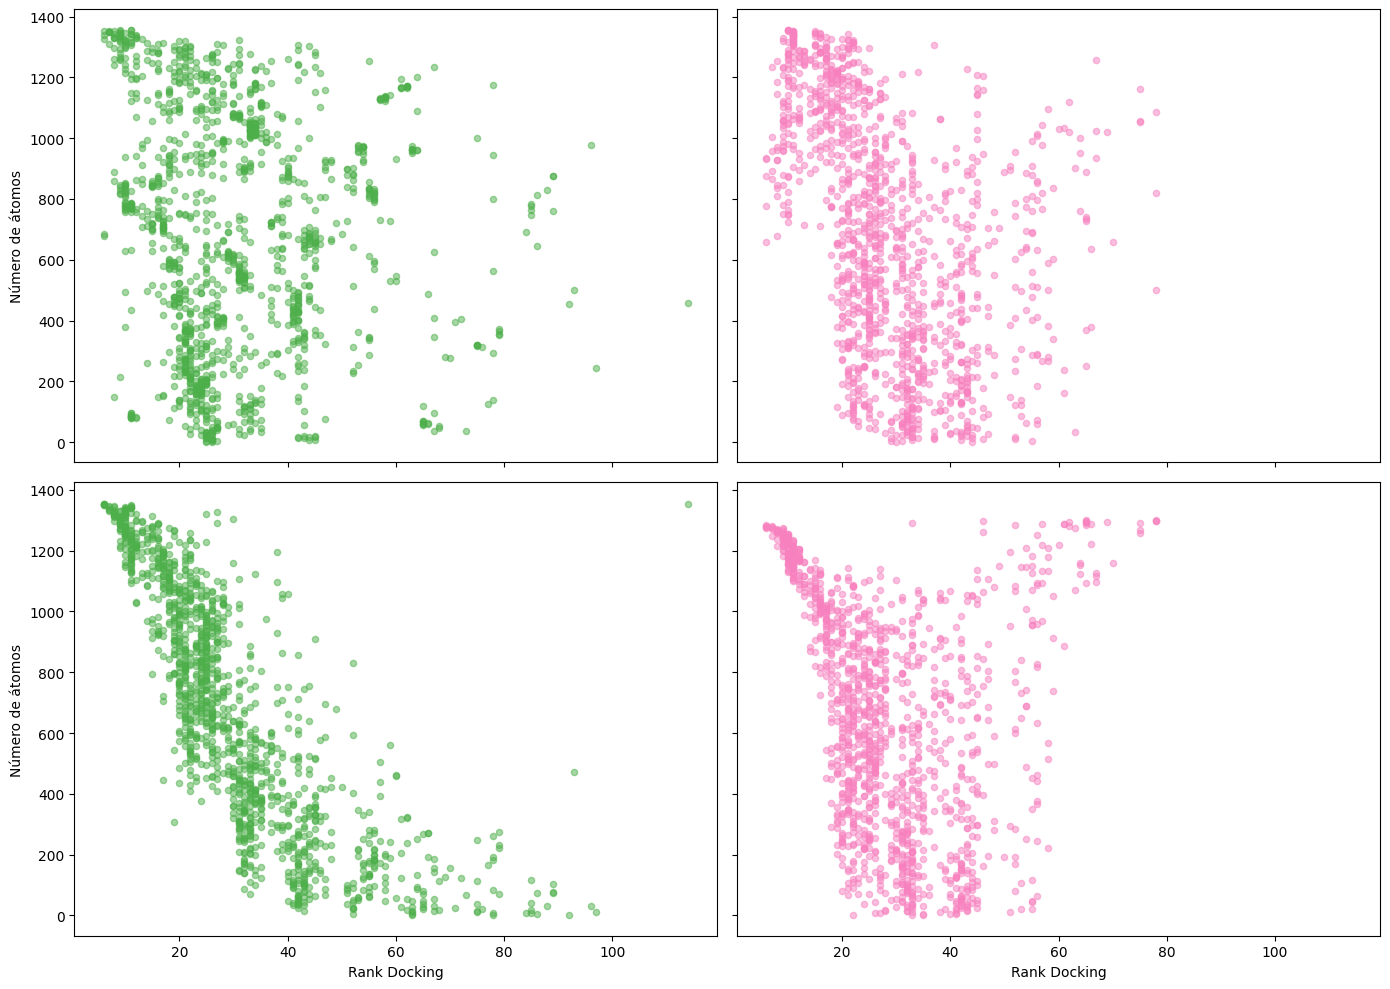

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    2, 2,
    figsize=(14, 10),
    sharey=True,    # eixo Y compartilhado
    sharex=True
)

# =====================================================
#  Linha 1 — BOLTZ (MCR left | Mer right)
# =====================================================

# ---- Painel A: MCR Boltz
df_mcr_cp.plot.scatter(
    ax=axes[0, 0],
    y='rank boltz',
    x='N_atoms',
    alpha=0.5,
    color=CB_color_cycle[0]
)
axes[0, 0].set_title("")
axes[0, 0].set_xlabel("Rank Boltz")
axes[0, 0].set_ylabel("Número de átomos")

# ---- Painel B: Mer Boltz
df_mer_cp.plot.scatter(
    ax=axes[0, 1],
    y='boltz_ranking',
    x='N_atoms',
    alpha=0.5,
    color=CB_color_cycle[1]
)
axes[0, 1].set_title("")
axes[0, 1].set_xlabel("Rank Boltz")
axes[0, 1].set_ylabel("")

# =====================================================
#  Linha 2 — DOCKING (MCR left | Mer right)
# =====================================================

# ---- Painel C: MCR Docking
df_mcr_cp.plot.scatter(
    ax=axes[1, 0],
    y='rank docking',
    x='N_atoms',
    alpha=0.5,
    color=CB_color_cycle[0]
)
axes[1, 0].set_title("")
axes[1, 0].set_xlabel("Rank Docking")
axes[1, 0].set_ylabel("Número de átomos")

# ---- Painel D: Mer Docking
df_mer_cp.plot.scatter(
    ax=axes[1, 1],
    y='docking_ranking',
    x='N_atoms',
    alpha=0.5,
    color=CB_color_cycle[1]
)
axes[1, 1].set_title("")
axes[1, 1].set_xlabel("Rank Docking")
axes[1, 1].set_ylabel("")

plt.savefig("vies_docking.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
